# Import

In [302]:
import requests
import numpy as np
from urllib.request import urlopen
from requests.models import PreparedRequest
from lxml import html
import re
import time
import matplotlib.pyplot as plt
import random

# Given Helper Functions (from lab)

In [303]:

# User Parameters
integrationTimeValue = 1000 # Integration time in ms, min = 100, max = 10000
pauseTimeValue = 1 # Pause time for motion in s
url = 'http://169.254.69.140:8080/?'

# Accessible parameters
diodeCurrent = "ild"
integrationTime = "int"
countRate = "cnt"
moterRef = "mref"

def quED_Access(url, action, param, reply = 0, value = []):
    """
    Function that accesses QED via an ethernet connection
    Inputs:
        url - IP adddress of instrument (find in settings)
        action - 'set' or 'get'
        param - the parameter to set or get (see below)
        reply - gives response output text, default false, true to debug
        value - value to pass in, default is empty
    Outputs:
        finalData.response.text - raw string response from instrument
        finalData.name - name of channel measured
        finalData.data - data from measured channel
    """
    
    class finalData:
        pass
    
    # For reading values out
    if (value == []):
        params = {'action':action,'param':param}
        req = PreparedRequest()
        req.prepare_url(url, params)
        response = requests.get(req.url)
    
    # For setting values
    else:
        params = {'action':action,'param':param,'value':value}
        req = PreparedRequest()
        req.prepare_url(url, params)
        response = requests.get(req.url)
    
    if reply == 1:
        if action == 'set':
            print(response.text.split("<body>")[1].split("</body>")[0])
        else:
            print(response.text)
    
    # For case where we measure count data
    if param == 'cnt':
        rawArray = response.text.split('<br>')
        truncArray = rawArray[2:-2] 
        numElem = len(truncArray)
        dataArray = np.zeros(numElem)
        labelArray  = ['0' for i in range(numElem)]

        for elem in range(numElem-1):
            extractLine = truncArray[elem].split(':')
            labelArray[elem] = (extractLine[0])
            dataArray[elem] = int(extractLine[1])

        finalData.name = labelArray
        finalData.data = dataArray
    
    finalData.response = response
    return finalData

#-- Some examples using this code below...
# output = quED_Access(url, 'set',  reply = 1, value = [45])
# output = quED_Access(url, 'set', m2', reply = 1, value = [-22.5])
# quED_Access.open()
# output = quED_Access(url, 'set', 'ild', reply = 1)
# # output = quED_Access.set_laser_current(20)
# output = quED_Access(url, 'get', 'cnt', reply = 0)
# output.data

# Automated Motor Tuning

To tune a specific motor, set line 9 to i == n, n is {1,2,3,4}

0
Set Motor 1 Position to 0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90.]
Set Motor 1 Position to 0.0
Set Motor 1 Position to 1.0
Set Motor 1 Position to 2.0
Set Motor 1 Position to 3.0
Set Motor 1 Position to 4.0
Set Motor 1 Position to 5.0
Set Motor 1 Position to 6.0
Set Motor 1 Position to 7.0
Set Motor 1 Position to 8.0
Set Motor 1 Position to 9.0
Set Motor 1 Position to 10.0
Set Motor 1 Position to 11.0
Set Motor 1 Position to 12.0
Set Motor 1 Position to 13.0
Set Motor 1 Position to 14.0
Set Motor 1 Position to 15.0
Set Motor 1 Position to 16.0
Set Motor 1 Position to 17.0
Set Motor 1 Position to 18.0
Set Motor 1 Position to 19.0
Set Motor 1 Position to 20.0
Se

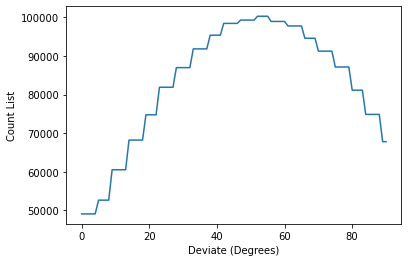

Set Motor 1 Position to 52.0
1
Set Motor 2 Position to 0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90.]
Set Motor 2 Position to 0.0
Set Motor 2 Position to 1.0
Set Motor 2 Position to 2.0
Set Motor 2 Position to 3.0
Set Motor 2 Position to 4.0
Set Motor 2 Position to 5.0
Set Motor 2 Position to 6.0
Set Motor 2 Position to 7.0
Set Motor 2 Position to 8.0
Set Motor 2 Position to 9.0
Set Motor 2 Position to 10.0
Set Motor 2 Position to 11.0
Set Motor 2 Position to 12.0
Set Motor 2 Position to 13.0
Set Motor 2 Position to 14.0
Set Motor 2 Position to 15.0
Set Motor 2 Position to 16.0
Set Motor 2 Position to 17.0
Set Motor 2 Position to 18.0
Set Motor 2 Position to 19.0
Se

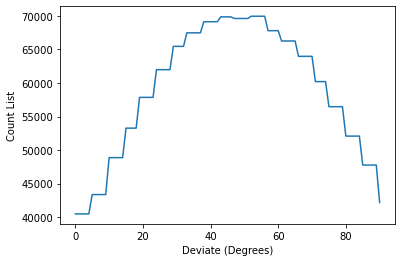

Set Motor 2 Position to 52.0
2
Set Motor 3 Position to 0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90.]
Set Motor 3 Position to 0.0
Set Motor 3 Position to 1.0
Set Motor 3 Position to 2.0
Set Motor 3 Position to 3.0
Set Motor 3 Position to 4.0
Set Motor 3 Position to 5.0
Set Motor 3 Position to 6.0
Set Motor 3 Position to 7.0
Set Motor 3 Position to 8.0
Set Motor 3 Position to 9.0
Set Motor 3 Position to 10.0
Set Motor 3 Position to 11.0
Set Motor 3 Position to 12.0
Set Motor 3 Position to 13.0
Set Motor 3 Position to 14.0
Set Motor 3 Position to 15.0
Set Motor 3 Position to 16.0
Set Motor 3 Position to 17.0
Set Motor 3 Position to 18.0
Set Motor 3 Position to 19.0
Se

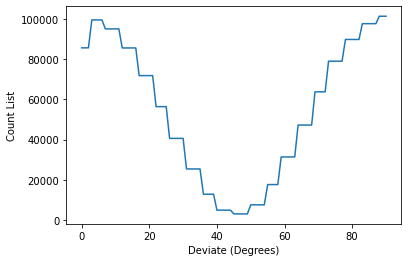

Set Motor 3 Position to 88.0
3
Set Motor 4 Position to 0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90.]
Set Motor 4 Position to 0.0
Set Motor 4 Position to 1.0
Set Motor 4 Position to 2.0
Set Motor 4 Position to 3.0
Set Motor 4 Position to 4.0
Set Motor 4 Position to 5.0
Set Motor 4 Position to 6.0
Set Motor 4 Position to 7.0
Set Motor 4 Position to 8.0
Set Motor 4 Position to 9.0
Set Motor 4 Position to 10.0
Set Motor 4 Position to 11.0
Set Motor 4 Position to 12.0
Set Motor 4 Position to 13.0
Set Motor 4 Position to 14.0
Set Motor 4 Position to 15.0
Set Motor 4 Position to 16.0
Set Motor 4 Position to 17.0
Set Motor 4 Position to 18.0
Set Motor 4 Position to 19.0
Se

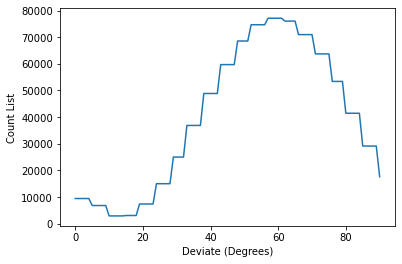

Set Motor 4 Position to 57.0
[52.0, 52.0, 88.0, 57.0]


In [417]:
def tune_motors():
    start = 0
    end = 90
    samples = end-start+1
    motor_list = ['pm1', 'pm2', 'pm3', 'pm4']
    output_list = [1, 0, 1, 0]
    deviate_angle = []
    for i in range(4):
        condition = True
        if condition:
            count_list = np.array([])
            print(i)
            output = quED_Access(url, 'set', motor_list[i], reply = 1, value = [start])
            time.sleep(2)

            angles = np.linspace(start, end, samples)
            print(angles)

            for x in angles:
                output = quED_Access(url, 'set', motor_list[i], reply = 1, value = [x])
                time.sleep(0.1)
                output = quED_Access(url, 'get', 'cnt', reply = 0)
                count_list = np.append(count_list, output.data[output_list[i]])

            plt.plot(angles, count_list)
            plt.xlabel('Deviate (Degrees)')
            plt.ylabel('Count List')
            print(f"max at {np.max(count_list)} at angle {angles[np.argmax(count_list)]}")
            plt.show()
            output = quED_Access(url, 'set', motor_list[i], reply = 1, value = [angles[np.argmax(count_list)]])
            deviate_angle.append(angles[np.argmax(count_list)])
    return deviate_angle
deviate_angle = tune_motors()
print(deviate_angle)
offset_pm1 = deviate_angle[0]
offset_pm2 = deviate_angle[1]
offset_pm3 = deviate_angle[2]
offset_pm4 = deviate_angle[3]

# Constants

In [305]:
count_threshold = 70000
coincidence_threshold = 28000
print(offset_pm4)

29.0


# IP Functions

In [421]:
def Alice_set_ip(bit, basis):
    "Check if the logic works with the polarization angles"
    # need an "if-else" for the truth table to work. multiplying by "bit" gives wrong result
    if bit == 1:
        output = quED_Access(url, 'set', 'pm3', reply = 1, value = [offset_pm3 + 45 + 22.5*basis])
        output = quED_Access(url, 'set', 'pm4', reply = 1, value = [offset_pm4 + 45 + 22.5*basis])
    elif bit == 0:
        output = quED_Access(url, 'set', 'pm3', reply = 1, value = [offset_pm3 + 45 + 22.5*basis])
        output = quED_Access(url, 'set', 'pm4', reply = 1, value = [offset_pm4 + 22.5*basis])
        
def Bob_set_ip(bit, basis):
    output = quED_Access(url, 'set', 'pm1', reply = 1, value = [offset_pm1 + 90*bit + 45*basis])
    output = quED_Access(url, 'set', 'pm2', reply = 1, value = [offset_pm2 + 90*bit + 45*basis])

    

In [422]:
def run_IP(alice_bit, bob_bit, alice_basis=0, bob_basis=0, threshold = 1):
    """
    Always measuring in a single basis. Lets use the + basis
    Initialize the polarizers both to just the offset that maximizes counts. This will represent bit 1
    Polarizer that is 90 degrees offset represents 0
    
    Args: alice_bit, bob_bit
    
    Alice's bit representation: 
    0: sends polarized light in vertical and horizontal polarizations in arms 1 and 2 respectively
    1: sends vertically polarized light
    
    Bob's bit representation: 
    0: Set polarizers to Horizontal
    1: Set polarizers to Vertical
    
    output.data[0] = detector 0 cnts
    output.data[1] = detector 1 cnts
    output.data[4] = coincidence 01 cnts
    """
    Alice_set_ip(alice_bit, alice_basis)
    Bob_set_ip(bob_bit, bob_basis)
    # sleep time to give the motors time to rotate
    
    output = quED_Access(url, 'get', 'pm1')
    print(f"printing pm1 result: {output}")
    
    coincidences = []
    time.sleep(0.4)
    for i in range(5):
        time.sleep(0.1)
        output = quED_Access(url, 'get', 'cnt', reply = 0)
        output.data
    #     print(output.data)
        coincidence_rate = output.data[4]
        coincidences.append(coincidence_rate)
    
    coincidence_rate = sum(coincidences)/(len(coincidences)-2)
    
    if coincidence_rate > threshold:
        return 1
    
    return 0
#     return coincidence_rate

## IP Test

In [399]:
n = 300
list_1 = [random.randint(0, 1) for _ in range(n)]
list_2 = [random.randint(0, 1) for _ in range(n)]

dot_product = np.dot(list_1, list_2)

match_list = [b for a, b in zip(list_1, list_2) if a == 1]
match_count = sum(match_list)

dot_product_list = []
for i in range(n):
    dot_product_list.append(1 if int(np.dot(list_1[i], list_2[i])) >= 1 else 0)

print(list_1)
print(list_2)
print(f"expected dot product result: {match_count}")
print(f"expected dot products result: {dot_product_list}")
print("---")

[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
[1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [400]:
dot_list = []
for i in range(0, n):
    dot = run_IP(list_1[i], list_2[i])
    dot_list.append(1 if int(dot) >= 1 else 0)
    print(f"iteration {i} done! dot result: {int(dot)}")
print(f"experimental dot product result: {sum(dot_list)}")
print(f"individual dot product result: {dot_list}")
match_experimental = [b for a, b in zip(dot_list, match_list) if a == 1]


Set Motor 3 Position to 107.0
Set Motor 4 Position to 74.0
Set Motor 1 Position to 90.0
Set Motor 2 Position to 90.0
printing pm1 result: <class '__main__.quED_Access.<locals>.finalData'>
iteration 0 done! dot result: 1
Set Motor 3 Position to 107.0
Set Motor 4 Position to 29.0
Set Motor 1 Position to 90.0
Set Motor 2 Position to 90.0
printing pm1 result: <class '__main__.quED_Access.<locals>.finalData'>
iteration 1 done! dot result: 0
Set Motor 3 Position to 107.0
Set Motor 4 Position to 29.0
Set Motor 1 Position to 90.0
Set Motor 2 Position to 90.0
printing pm1 result: <class '__main__.quED_Access.<locals>.finalData'>
iteration 2 done! dot result: 0
Set Motor 3 Position to 107.0
Set Motor 4 Position to 29.0
Set Motor 1 Position to 90.0
Set Motor 2 Position to 90.0
printing pm1 result: <class '__main__.quED_Access.<locals>.finalData'>
iteration 3 done! dot result: 0
Set Motor 3 Position to 107.0
Set Motor 4 Position to 74.0
Set Motor 1 Position to 0.0
Set Motor 2 Position to 0.0
print

In [402]:
correct_list = []
num_wrong = 0
for i in range(len(dot_product_list)):
    if dot_product_list[i] != dot_list[i]:
        correct_list.append(f"Wrong {i}")
        num_wrong += 1
    else:
        correct_list.append("C")
print(correct_list)
print(f'The percentage of incorrect calculations is {100* num_wrong/len(dot_product_list)} percent')

['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Wrong 13', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C

# QKD Functions

In [423]:
def Alice_set_QKD(bit, basis):
    """
    basis:
    0 -> "+", or HV basis
    1 -> "x", or DA basis
    bits:
    0 -> (H in "+" basis), (D in "x" basis)
    1 -> (V in "+" basis) ,(A in "x" basis)
    """
    try:
        output = quED_Access(url, 'set', 'pm3', reply = 1, value = [offset_pm3 + 45*bit + 22.5*basis])
        output = quED_Access(url, 'set', 'pm4', reply = 1, value = [offset_pm4 + 45*bit + 22.5*basis])
        time.sleep(0.5)
    except ValueError:
        print("invalid input")

def Bob_set_QKD(basis):
    """
    basis:
    0 -> "+", or HV basis
    1 -> "x", or DA basis
    bits:
    0 -> (H in "+" basis), (D in "x" basis)
    1 -> (V in "+" basis) ,(A in "x" basis)
    
    Because Bob has 2 paths, he can test a random bit in the "+" and "x" bases
    """
    # "0" bit
    output = quED_Access(url, 'set', 'pm1', reply = 1, value = [offset_pm1 + 45*basis])
    # "1" bit
    output = quED_Access(url, 'set', 'pm2', reply = 1, value = [offset_pm2 + 45*basis + 90])
    time.sleep(0.5)
    output = quED_Access(url, 'get', 'cnt', reply = 0)
    output.data
    count_1 = output.data[0]
    count_2 = output.data[1]
    
    return count_1, count_2

def run_QKD(alice_bit, bob_bit, alice_basis, n):
    """
    bit is now basis
    """
    Bob_1_list = []
    Bob_2_list = []
    for i in range(n):
        Alice_set_QKD(alice_bit[i], alice_basis[i])
        Bob_1, Bob_2 = Bob_set_QKD(bob_bit[i])
        Bob_1_list.append(Bob_1)
        Bob_2_list.append(Bob_2)
        print(f"iteration {i+1} complete!")
    return Bob_1_list, Bob_2_list
    

n = 300
list_Alice_basis = [random.randint(0, 1) for _ in range(n)]
print(f"Alice's bases: {list_Alice_basis}")
list_Alice_bits =  [random.randint(0, 1) for _ in range(n)]
print(f"Alice's bits: {list_Alice_bits}")
list_Bob_bases =  [random.randint(0, 1) for _ in range(n)]
print(f"Bob's bases: {list_Bob_bases}")

Bob_1_list, Bob_2_list = run_QKD(list_Alice_bits, list_Bob_bases, list_Alice_basis, n)
print(f"Bob 1: {Bob_1_list}")
print(f"Bob 2: {Bob_2_list}")

Alice's bases: [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1]
Alice's bits: [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 

## Experimental Data

In [ ]:
Bob_1 = [1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 2.0]
Bob_AD_bits = [int(x) for x in Bob_1]
Bob_2 = [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 1.0]
Bob_HV_bits = [int(x) for x in Bob_2]
print(f"AD bits: {Bob_AD_bits}")
print(f"HV bits: {Bob_HV_bits}")
motor_3_pos = [129.5, 107, 62, 129.5, 129.5, 84.5, 84.5, 107, 129.5, 84.5, 107, 62, 129.5, 84.5, 129.5, 62, 129.5, 84.5, 84.5, 62, 62, 129.5, 84.5, 84.5, 107, 62, 107, 84.5, 129.5, 62, 62, 84.5, 107, 129.5, 107, 62, 84.5, 129.5, 129.5, 62, 62, 129.5, 129.5, 84.5, 62, 129.5, 129.5, 84.5, 129.5, 129.5, 129.5, 129.5, 62, 62, 107, 129.5, 107, 129.5, 62, 62, 129.5, 62, 107, 84.5, 107, 62, 107, 107, 62, 107, 107, 107, 62, 62, 107, 107, 62, 84.5, 129.5, 129.5, 129.5, 129.5, 84.5, 107, 84.5, 129.5, 107, 62, 129.5, 107, 107, 107, 129.5, 62, 107, 62, 62, 62, 84.5, 84.5, 62, 62, 129.5, 107, 129.5, 84.5, 84.5, 107, 129.5, 129.5, 107, 62, 129.5, 107, 62, 84.5, 84.5, 129.5, 62, 84.5, 129.5, 129.5, 84.5, 84.5, 129.5, 62, 62, 107, 129.5, 129.5, 129.5, 107, 62, 84.5, 107, 107, 107, 129.5, 62, 62, 129.5, 129.5, 62, 62, 107, 62, 107, 84.5, 84.5, 62, 62, 129.5, 62, 129.5, 107, 107, 129.5, 84.5, 107, 107, 62, 84.5, 107, 62, 84.5, 129.5, 62, 129.5, 84.5, 107, 62, 84.5, 62, 107, 62, 129.5, 62, 129.5, 129.5, 62, 107, 62, 107, 107, 62, 62, 84.5, 84.5, 107, 129.5, 107, 107, 107, 107, 107, 84.5, 62, 129.5, 84.5, 84.5, 129.5, 107, 84.5, 84.5, 107, 84.5, 129.5, 84.5, 62, 84.5, 129.5, 84.5, 107, 129.5, 84.5, 62, 129.5, 107, 62, 84.5, 129.5, 62, 62, 62, 62, 62, 62, 129.5, 129.5, 62, 107, 129.5, 62, 84.5, 129.5, 129.5, 62, 62, 62, 84.5, 62, 62, 62, 84.5, 84.5, 84.5, 107, 62, 84.5, 107, 84.5, 129.5, 62, 84.5, 107, 84.5, 84.5, 62, 62, 107, 107, 84.5, 129.5, 62, 84.5, 84.5, 107, 107, 62, 129.5, 129.5, 107, 107, 62, 84.5, 107, 84.5, 84.5, 84.5, 129.5, 84.5, 107, 84.5, 107, 129.5, 129.5, 84.5, 129.5, 129.5, 107, 129.5, 84.5, 62, 107, 129.5, 84.5, 62, 62, 129.5, 84.5]
Bob_guess_angle = [90, 90, 90, 0, 0, 0, 90, 90, 90, 0, 90, 90, 0, 90, 0, 0, 90, 0, 0, 0, 0, 90, 0, 90, 90, 0, 90, 90, 90, 0, 0, 0, 0, 0, 90, 90, 90, 90, 90, 0, 0, 0, 0, 90, 90, 90, 0, 0, 90, 0, 0, 90, 90, 90, 0, 90, 90, 90, 90, 90, 0, 0, 90, 90, 90, 90, 0, 90, 0, 90, 0, 0, 0, 90, 0, 0, 0, 90, 90, 90, 90, 90, 0, 90, 90, 90, 90, 90, 90, 0, 0, 90, 0, 90, 0, 90, 90, 0, 90, 90, 90, 90, 90, 0, 90, 0, 0, 0, 90, 0, 90, 90, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 90, 0, 0, 0, 90, 0, 90, 0, 0, 0, 90, 90, 0, 0, 0, 90, 0, 0, 0, 90, 90, 90, 90, 0, 90, 0, 90, 0, 90, 0, 90, 90, 0, 90, 90, 0, 0, 90, 90, 90, 0, 0, 0, 90, 90, 90, 0, 90, 90, 90, 0, 0, 90, 90, 0, 90, 90, 90, 0, 90, 0, 90, 90, 0, 90, 90, 0, 90, 0, 0, 0, 90, 90, 0, 90, 90, 0, 90, 0, 90, 90, 90, 0, 0, 0, 0, 90, 90, 0, 90, 0, 90, 90, 90, 0, 90, 0, 90, 0, 0, 0, 90, 0, 90, 0, 0, 90, 0, 90, 90, 0, 0, 90, 90, 0, 0, 0, 90, 0, 90, 0, 0, 90, 90, 90, 0, 90, 90, 90, 90, 90, 0, 0, 0, 0, 90, 0, 0, 0, 0, 90, 90, 90, 0, 90, 90, 90, 0, 90, 0, 0, 90, 0, 90, 0, 0, 90, 0, 0, 90, 90, 0, 90, 90, 0, 90, 0, 90, 90, 0, 0, 0, 0, 90, 0, 0, 90, 0]

Alice_basis = []
Alice_bits = []
Bob_guess = []

for i in range(len(motor_3_pos)):
    Alice_basis.append(0 if (motor_3_pos[i] == 62 or motor_3_pos[i] == 107) else 1)
    Alice_bits.append(0 if (motor_3_pos[i] == 62 or motor_3_pos[i] == 84.5) else 1)
    Bob_guess.append(0 if Bob_guess_angle[i] == 0 else 1)


#I had to do a lot of back calculations to retrieve these,
#should have been logging the random bits and bases
print(Alice_basis)
print(len(Alice_basis))
print(Alice_bits)
print(Bob_guess)

## Step 1: Keep information with matching bases

In [ ]:
# Because we have both bases to measure the data, the length of the sifted bases should 
# be the same, just taking sifted data from either the HV or AD bases
Bob_sifted_bits = []
for i in range(n):
    if Alice_basis[i] == 0:
        Bob_sifted_bits.append(Bob_HV_bits[i])
    else:
        Bob_sifted_bits.append(Bob_AD_bits[i])
print(Bob_sifted_bits)
print(len(Bob_sifted_bits))
print(Alice_bits)


[1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2]
300
[1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0

## Step 2: Keep information where Bob measured "1"

In [ ]:
basis_saved = []
new_bits_Alice = []
new_bits_Bob = []
Bob_guess_sifted = []
for i in range (len(Bob_sifted_bits)):
    Bool1 = Bob_sifted_bits[i] == 1
    if Bool1:
        basis_saved.append(Alice_basis[i])
        new_bits_Alice.append(Alice_bits[i])
        new_bits_Bob.append(Bob_sifted_bits[i])
        Bob_guess_sifted.append(Bob_guess[i])
print(len(new_bits_Bob))
# print(basis_saved)
print(new_bits_Alice)
print(new_bits_Bob)
print(Bob_guess_sifted)
print(len(Bob_guess_sifted))

71
[1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]
71


## Step 3: Run Error Code

In [ ]:
# Estimate the q BER by revealing some of the bits.

length_reveal = 40

# errors = (bits_tx_sifted[0:length_reveal - 1] != bits_rx_sifted[0:length_reveal - 1]).astype(int)
# errors_total = errors.sum()
# BER = 1.0/length_reveal * errors.sum()

Al_all = np.array(new_bits_Alice)
Bob_all = np.array(Bob_guess_sifted)

# Al_all = np.array(Alice_AD_sifted)
# Bob_all = np.array(Bob_AD_sifted)

# give Bob some errors for testing
# pr = 0.08
# err_vec = np.random.choice([0,1],length_reveal+76,p=[1-pr,pr])
# print(len(err_vec))
# Al_all = [1 for x in range(96)]
# Al_all = Al_all ^ err_vec

key_test = Al_all[0:length_reveal]
Bob_test = Bob_all[0:length_reveal]
BERest =  np.mean(key_test != Bob_test)
print(BERest)

print(Al_all)
print(Bob_all)



0.05
[1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1]
[1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0
 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1]


# Debug IP

In [385]:
aa = run_IP(1,1)
ab = run_IP(0,1)
ba = run_IP(1,0)
bb = run_IP(0,0)
print(f"input 11: {aa}")
print(f"input 01: {ab}")
print(f"input 10: {ba}")
print(f"input 00: {bb}")

Set Motor 3 Position to 107.0
Set Motor 4 Position to 74.0
Set Motor 1 Position to 90.0
Set Motor 2 Position to 90.0
printing pm1 result: <class '__main__.quED_Access.<locals>.finalData'>
Set Motor 3 Position to 107.0
Set Motor 4 Position to 29.0
Set Motor 1 Position to 90.0
Set Motor 2 Position to 90.0
printing pm1 result: <class '__main__.quED_Access.<locals>.finalData'>
Set Motor 3 Position to 107.0
Set Motor 4 Position to 74.0
Set Motor 1 Position to 0.0
Set Motor 2 Position to 0.0
printing pm1 result: <class '__main__.quED_Access.<locals>.finalData'>
Set Motor 3 Position to 107.0
Set Motor 4 Position to 29.0
Set Motor 1 Position to 0.0
Set Motor 2 Position to 0.0
printing pm1 result: <class '__main__.quED_Access.<locals>.finalData'>
input 11: 1
input 01: 0
input 10: 0
input 00: 0
